# Faces-HQ

In this notebook we show the results for Faces-HQ. You can create from scratch the features or use the pre-computed ones.

### 1. Create feature

If you want to create the features, first of all download the data from [link](https://cutt.ly/6enDLYG). Be sure to save the folder together with this notebook.

Otherwise, just jump to section 2.

In [1]:
import cv2
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
import pickle

In [2]:
path = ['thispersondoesntexists', '100KFake','Flickr-Faces-HQ2_', 'celebA-HQ_10K']
labels = [1,1,0,0]
format_file = ['jpg','jpg','jpg', 'jpg']
epsilon = 1e-8
data = {}
#number of samples from each dataset
stop = 250
number_iter = 4 * stop
psd1D_total = np.zeros([number_iter, 722])
label_total = np.zeros([number_iter])
iter_ = 0

In [3]:
def azimuthalAverage(image, center=None):
    #Calculate the indices from the image
    y,x= np.indices(image.shape)

    #Calculate the center indices from the image
    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
    r= np.hypot(x-center[0], y - center[1])

    #for sorted radii
    ind= np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted=image.flat[ind]

    #For the integral part of the radii
    r_int=r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
     #Binning groups continuous data into categories defined by specific ranges
    deltar=r_int[1:]-r_int[:-1]
    rind = np.where(deltar)[0]
    nr=rind[1:]-rind[:-1]

    # Cumulative sum to get each radius bin
    csim=np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]]-csim[rind[:-1]]

    radial_prof=tbin / nr
    return radial_prof

In [4]:
for z in range(4):
    cont = 0
    psd1D_average_org = np.zeros(722)
    print(path[z])

    for filename in glob.glob(path[z]+"/*."+format_file[z]):
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

thispersondoesntexists
100KFake
Flickr-Faces-HQ2_
celebA-HQ_10K


In [5]:
data["data"] = psd1D_total
data["label"] = label_total

In [6]:
output = open('dataset_freq_1000.pkl', 'wb')
pickle.dump(data, output)
output.close()
print("DATA Saved")

DATA Saved


### 2. Loading Features

Now, we load the features. Either the pre-computed ones or the features that you have created.

In [7]:
import cv2
import pickle

In [8]:
# Function to load images from a directory
def load_images(directory):
  images = []
  file_names = ["E:\\Final_Project\\datasets\\celeb-df dataset\\training_fake"]
  for file in os.listdir(directory):
        if file.endswith(".jpg") or file.endswith(".png"):  # Add more extensions if needed
            file_path = os.path.join(directory, file)
            img = cv2.imread(file_path)
            if img is not None:
                images.append(img)
                file_names.append(file)
            else:
                print(f"Unable to read image: {file_path}")
                return images, file_names

In [9]:
#directory containing the images
image_directory = "//content//sample_data"

In [10]:
import os

In [11]:
print(image_directory)

//content//sample_data


In [12]:
try:
    with open("//content//sample_data//easy_100_1111.jpg", 'rb') as file:
        content = file.read()
        # Do something with the file content
except FileNotFoundError:
    print("The file does not exist or the path is incorrect.")
except PermissionError:
    print("You don't have permission to access this file.")

In [13]:
!ls "//content//sample_data//easy_100_1111.jpg"

//content//sample_data//easy_100_1111.jpg


In [14]:
!pip install tensorflow
import tensorflow as tf

def load_images(image_directory):
    # Check if the directory exists
    if not tf.io.gfile.exists(image_directory):
        raise ValueError('Image directory does not exist.')

    # Get a list of all files in the directory
    files = tf.io.gfile.listdir(image_directory)

    # Filter the files to only include images
    images = []
    file_names = []
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image = tf.io.read_file(image_directory + file)
            image = tf.image.decode_jpeg(image)
            images.append(image)
            file_names.append(file)

    return images, file_names

In [15]:
!ls //content//sample_data/easy_132_0110.jpg

//content//sample_data/easy_132_0110.jpg


In [16]:
image_directory = "//content//sample_data/"
file_path = image_directory + "easy_132_0110.jpg"

!ls $file_path

//content//sample_data/easy_132_0110.jpg


In [17]:
# Load images
images, file_names = load_images(image_directory)

In [18]:
# Create a dictionary to store images with their filenames
image_data = {"images": images, "file_names": file_names}

In [19]:
# Save the image data to a pickle file
pickle_file_path = "image_data.pkl"
with open(pickle_file_path, 'wb') as f:
    pickle.dump(image_data, f)

In [20]:
print("Image data saved to:", pickle_file_path)

Image data saved to: image_data.pkl


In [21]:
# load feature file
pkl_file = open('image_data.pkl', 'rb')
data = pickle.load(pkl_file)

In [22]:
print(data)

{'images': [<tf.Tensor: shape=(600, 600, 3), dtype=uint8, numpy=
array([[[144, 167, 115],
        [142, 165, 113],
        [139, 162, 108],
        ...,
        [186, 194, 155],
        [187, 195, 158],
        [184, 192, 155]],

       [[142, 165, 113],
        [141, 164, 112],
        [140, 163, 109],
        ...,
        [185, 193, 154],
        [187, 195, 158],
        [187, 194, 160]],

       [[141, 164, 112],
        [141, 164, 112],
        [140, 163, 111],
        ...,
        [182, 192, 155],
        [184, 194, 157],
        [187, 197, 162]],

       ...,

       [[110,  85,  65],
        [129, 111,  87],
        [125, 105,  81],
        ...,
        [165, 150, 119],
        [164, 149, 118],
        [163, 150, 116]],

       [[139, 114,  92],
        [122, 104,  80],
        [108,  90,  68],
        ...,
        [165, 150, 119],
        [163, 150, 118],
        [163, 150, 116]],

       [[120,  96,  72],
        [107,  89,  65],
        [103,  86,  66],
        ...,
        [

In [23]:
import os

In [24]:
hdf5_file_path = os.path.abspath("//content//image_data.pkl")

In [25]:
print(hdf5_file_path)

//content/image_data.pkl


In [26]:
!pip install h5py

In [27]:
pkl_file = open('/content/image_data.pkl', 'rb')

In [28]:
data = pickle.load(pkl_file)

In [29]:
pkl_file.close()

In [30]:
print(data.keys())

dict_keys(['images', 'file_names'])


In [31]:
X = data ["images"]
y = data ["file_names"]

We look at the label distribution, to be sure that we have a balanced dataset.

['easy_100_1111.jpg', 'easy_132_0110.jpg']

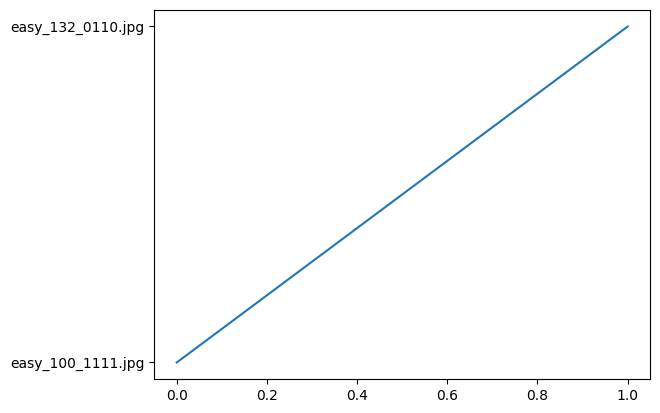

In [32]:
plt.plot(y)
y

### 3. Check Spectrum

We have a look to the spectrum

In [33]:
X = tf.convert_to_tensor(X)

In [34]:
num = int(X.shape[0]/2)
num_feat = X.shape[1]

In [35]:
psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

In [36]:
# We separate real and fake using the label
for x in range(X.shape[0]):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1

In [37]:
# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])

### 4. Classification

Now we classify using the features.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

num = 10
LR = 0
SVM = 0


for z in range(num):

    pkl_file = open('dataset_freq_1000.pkl', 'rb')

    data = pickle.load(pkl_file)

    pkl_file.close()
    X = data["data"]
    y = data["label"]

    try:

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        from sklearn.svm import SVC
        svclassifier = SVC(kernel='linear')
        svclassifier.fit(X_train, y_train)


        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(solver='liblinear', max_iter=1000)
        logreg.fit(X_train, y_train)



        SVM+=svclassifier.score(X_test, y_test)
        LR+=logreg.score(X_test, y_test)


    except:
        num-=1
        print(num)

9
8
7
6
5
4
3
2
1
0


In [39]:
import sys

In [40]:
# Print the current call stack
print(sys.exc_info()[2])

None


In [41]:
import sys

try:
    # Code that might raise an exception
    raise ValueError("This is an error")
except Exception:
    # Print the code object for the current function
    print(sys.exc_info()[2].tb_frame.f_code)

<code object <cell line: 3> at 0x7b42ec18aef0, file "<ipython-input-41-293ece5ae3d5>", line 1>


In [42]:
print(f"Current value of num: {num}")

Current value of num: 0


In [43]:
print(f"Traceback:\n{sys.exc_info()[2]}")

Traceback:
None


In [44]:
#check if sys.exc_info() returns a tuple:
exc_info = sys.exc_info()
if not isinstance(exc_info, tuple):
    print("sys.exc_info() did not return a tuple.")
    exit()

In [45]:
#check if the 3rd element of the tuple is not None
if exc_info[2] is None:
    print("The third element of the tuple is None.")
    exit()

The third element of the tuple is None.


In [46]:
import sys

In [47]:
tb = sys.exc_info()[2]

In [48]:
!pip install colorama

In [49]:
from colorama import Fore

In [50]:
num = 1

In [51]:
try:
    if num == 0:
        raise ValueError("Variable 'num' is zero. Investigate why it is being decremented.")
except NameError:
    print(Fore.RED + "Variable 'num' is not defined. Please assign a value to it.")

In [52]:
import sys

In [53]:
print(sys.modules[__name__].__dict__)

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import cv2\nimport numpy as np\nimport os\nimport glob\nfrom matplotlib import pyplot as plt\nimport pickle', "path = ['thispersondoesntexists', '100KFake','Flickr-Faces-HQ2_', 'celebA-HQ_10K']\nlabels = [1,1,0,0]\nformat_file = ['jpg','jpg','jpg', 'jpg']\nepsilon = 1e-8\ndata = {}\n#number of samples from each dataset\nstop = 250\nnumber_iter = 4 * stop\npsd1D_total = np.zeros([number_iter, 722])\nlabel_total = np.zeros([number_iter])\niter_ = 0", 'def azimuthalAverage(image, center=None):\n    #Calculate the indices from the image\n    y,x= np.indices(image.shape)\n\n    #Calculate the center indices from the image\n    if not center:\n        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])\n    r= n

In [54]:
if 'SVM' in sys.modules[__name__].__dict__ and 'LR' in sys.modules[__name__].__dict__:
    print("Average SVM: "+str(SVM/num))
    print("Average LR: "+str(LR/num))
else:
    print("SVM and LR variables are not defined.")

Average SVM: 0.0
Average LR: 0.0


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

num=10
SVM=0
SVM_r=0
SVM_p=0
LR = 0

In [ ]:
print("Average SVM: "+str(SVM/num))
print("Average LR: "+str(LR/num))

## Test on real images

In [ ]:
def extract_features(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return hist

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path ="//content//sample_data//easy_100_1111.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
psd1D_org_0_mean = np.zeros(256)
psd1D_org_0_std = np.zeros(256)

In [ ]:
print(extract_features)

In [ ]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [ ]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [ ]:
print(reshaped_features.size)

In [ ]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [ ]:
padded_x.size

In [ ]:
from sklearn.svm import SVC

In [ ]:
svclassifier = SVC(kernel='linear', C=1.0)

In [ ]:
svclassifier = SVC(kernel='linear')

In [ ]:
print(locals())

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
x_train = df.drop('longitude', axis=1)
y_train = df['total_rooms']

In [ ]:
svclassifier.fit(x_train, y_train)

In [ ]:
print(svm_prediction[0])

In [ ]:
Lr_prediction=logreg.predict(padded_x)

In [ ]:
print(Lr_prediction[0])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "C:\\Users\\WhiteLuce SIS\\OneDrive\\PFE tests\\deepfakes_detection\\real7.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [ ]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [ ]:
print(reshaped_features.size)

In [ ]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [ ]:
svm_prediction = svclassifier.predict(padded_x)

In [ ]:
print(svm_prediction[0])

In [ ]:
Lr_prediction=logreg.predict(padded_x)

In [ ]:
print(Lr_prediction[0])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "C:\\Users\\WhiteLuce SIS\\OneDrive\\PFE tests\\deepfakes_detection\\dataset\\real\\realaytzyidmgs_0.png"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [ ]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [ ]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [ ]:
svm_prediction = svclassifier.predict(padded_x)

In [ ]:
print(svm_prediction[0])

In [ ]:
Lr_prediction=logreg.predict(padded_x)

In [ ]:
print(Lr_prediction[0])

## Test on fake images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "C:\\Users\\WhiteLuce SIS\\OneDrive\\PFE tests\\deepfakes_detection\\kaggle\\test.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [ ]:

# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [ ]:
print(reshaped_features.size)

In [ ]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [ ]:
svm_prediction = svclassifier.predict(padded_x)

In [ ]:
print(svm_prediction[0])

In [ ]:

Lr_prediction=logreg.predict(padded_x)

In [ ]:
print(Lr_prediction[0])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = "C:\\Users\\WhiteLuce SIS\\OneDrive\\PFE tests\\deepfakes_detection\\deepfake_1.jpg"

# Load the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Normalize the features using the statistics computed earlier
normalized_features = np.zeros_like(psd1D_org_0_mean[:256])
epsilon = 1e-8  # Small epsilon value to avoid division by zero
for i in range(len(normalized_features)):
    normalized_features[i] = (extract_features(image)[i] - psd1D_org_0_mean[i]) / (psd1D_org_0_std[i] + epsilon)

In [ ]:
# Reshape the features to match the classifier's input shape
reshaped_features = normalized_features.reshape(1, -1)

In [ ]:
print(reshaped_features.size)

In [ ]:
expected_features=722
padded_x = np.pad(reshaped_features, (0, expected_features - reshaped_features.size), mode='constant')
reshaped_x = np.reshape(padded_x, (expected_features, -1))

In [ ]:
svm_prediction = svclassifier.predict(padded_x)

In [ ]:
print(svm_prediction[0])

In [ ]:
Lr_prediction=logreg.predict(padded_x)

In [ ]:
print(Lr_prediction[0])